# Encuentra los parametros cosmologicos cond datos de supernovas 

$\mu$ es el modulo de distancia de la supernva definido como:
$\mu = 25 - 5log_{10}h+5log_{10}(D^*_L)$

    

Donde $D^*_L = D_L(h=1)$ es la distancia luminosa que para un universo plano se puede definir como: $D_L(z) = \frac{c}{H0}(1+z)\left[\eta(1,\Omega_m)-\eta(\frac{1}{1+z},\Omega_m)\right]$,

con $\eta(a,\Omega_m) = 2\sqrt{s^3+1}\left[\frac{1}{a^4}-0.1540\frac{s}{a^3} + 0.4304\frac{s^2}{a^2} + 0.19097\frac{s^3}{a} + 0.066941s^4\right]^{-1/8}$

y: $s^3=(1-\Omega_m)/\Omega_m$

In [20]:
# Importamos librerias
%pylab inline
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import emcee
import corner
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
data = np.loadtxt('jla_mub.txt').T
cov_mat = np.loadtxt('jla_mub_covmatrix.dat').T
cov_mat = np.reshape(cov_mat,(-1,31))
invcov = np.linalg.inv(cov_mat)
H0 = 100
z = data
c = 3e5

### Construimos las funciones para evaluar el modelo:

In [3]:
def eta(a, Om):
    s3 = (1-Om)/Om 
    s2 = s3**(2/3)
    s = s3**(1/3)
    return 2*np.sqrt(s3+1)*((1/(a**4))-0.1540*s/(a**3)+0.4304*s2/(a**2)+0.19097*s3/a+(0.06694*s**4))**(-1/8)

def DL(z, H0, Om):
    return (c/H0)*(1+z)*(eta(1, Om)-eta(1/(1+z),Om))

def mu(z,H0,Om):
    return 25-5*np.log10(H0/100)+5*np.log10(DL(z, H0, Om))


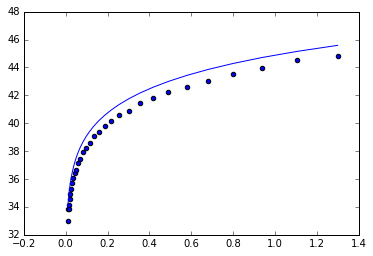

In [4]:
# Graficamos un conjuntp de datos
plot(data[0],mu(data[0],70,0.3))
scatter(data[0], data[1])

### Definimos una funcion para el Likelihood y una funcion para la cadena de Markov - Monte Carlo

Likelihood:

$\mathcal{L} \propto \prod_i^n \frac{1}{2\pi\sigma_i^2}\exp\left[ -\frac{(x_i -\mu)^2}{2\sigma_i^2} \right]$

Logaritmo del Likelihood: 

$\ln(\mathcal{L}) \propto -\sum_i^n \left[\frac{(x_i -\mu)^2}{2\sigma_i^2} \right]$

In [5]:
def lnlh(theta):
    modelo=mu(data[0], theta[0],theta[1])
    diferencia = data[1]-modelo
    u=0
    u = np.dot(diferencia, invcov)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = np.random.rand()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

In [6]:
Nmuestras = 1000
sigma1 = 1
sigma2 = 0.1

Ncadenas = 8
thetas = [50,0.3]
cadenas = []

for j in range(Ncadenas):
    thetas = np.array([np.random.normal(np.random.uniform(50, 100), sigma1), np.random.normal(thetas[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetas
        else:
            thetat = np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])
            thetanuevo = Markov(thetas, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetas = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [7]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

### Graficamos las cadenas generadas

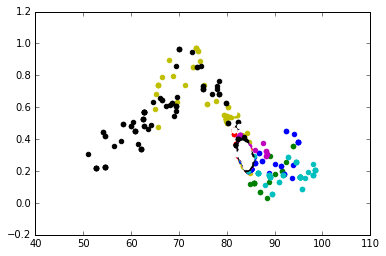

In [8]:
plt.scatter(x1, y1, color = 'g')
plt.scatter(x2, y2, color = 'r')
plt.scatter(x3, y3, color = 'y')
plt.scatter(x4, y4, color = 'b')
plt.scatter(x5, y5, color = 'c')
plt.scatter(x6, y6, color = 'm')
plt.scatter(x7, y7, color = 'k')
plt.scatter(x8, y8, color = 'w')

(0.15, 0.5)

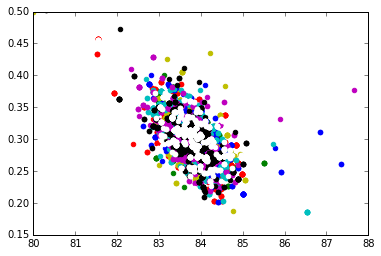

In [9]:
plt.scatter(x1, y1, color = 'g')
plt.scatter(x2, y2, color = 'r')
plt.scatter(x3, y3, color = 'y')
plt.scatter(x4, y4, color = 'b')
plt.scatter(x5, y5, color = 'c')
plt.scatter(x6, y6, color = 'm')
plt.scatter(x7, y7, color = 'k')
plt.scatter(x8, y8, color = 'w')
plt.xlim(80, 88)
plt.ylim(0.15, 0.5)

## Marginalización y estimación de incertidumbre

Definimos el 'prior' como:

$p(H,\Omega)= \begin{array}{lcc} 1, &   if  & 50 \leq H \leq 100 \quad and \quad 0 \leq \Omega \leq 1   0, &       &de  otra  forma \end{array}$

In [18]:
def lnprior(theta):
    H,omg,lnf=theta
    if 50 < H <100  and 0 < omg < 1.0 and -10.0 < lnf < 1.0 :
        return 0.0
    return -np.inf

def lnprob(theta,x,mu,var):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlik(theta,z,mu,var)

In [12]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

NameError: name 'result' is not defined

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob , args=(z,mu,var))

In [ ]:
sampler.run_mcmc(pos,500)

In [ ]:
x_g = np.linspace(0.0, 500, 500)
y_H = 83.94 *np.ones(500)
y_omg = 0.294*np.ones(500)
plt.figure(figsize=(15,10))
for i in range(nwalkers):
    plt.subplot(2, 1, 1)
    plt.plot(x_g, sampler.chain[i,:,0], 'k-')
    plt.plot(x_g, y_H, '-')
    plt.ylabel('$H$',fontsize = 18)

    plt.subplot(2, 1, 2)
    plt.plot(x_g, sampler.chain[i,:,1], 'k-')
    plt.plot(x_g, y_omg, '-')
    plt.ylabel('$\Omega_m$',fontsize = 18)
    plt.xlabel('$stepnumber$',fontsize = 18)
plt.show()

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

## Resultados

In [ ]:

fig = corner.corner(samples, labels=["$H0$", "$\Omega_m$", "$\ln\,f$"],
                      truths=[H_true, omg_true, np.log(lnf_true)])
fig.savefig("triangle.png")

